In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import string
import sys  
from datetime import datetime

In [2]:
fake_news = pd.read_csv('Fake.csv')
fake_news['True/False'] = 0
fake_news.head()

,title,text,subject,date,True/False
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [3]:
true_news = pd.read_csv('True.csv')
true_news['True/False'] = 1
true_news.describe()

,True/False
count,21417.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [4]:
news = fake_news.append(true_news, ignore_index=True)
news.tail()

/tmp/ipykernel_12381/600879063.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = fake_news.append(true_news, ignore_index=True)


,title,text,subject,date,True/False
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


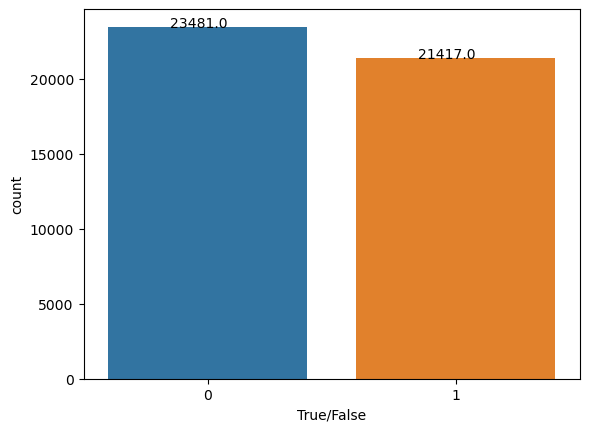

In [5]:
ax=sb.countplot(data=news, x=news["True/False"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

# Cleaning the News Dataset

### Information Leak 1: 
Analysing the dataset, we found that 99.2% of the true news contains the word "(Reuters)" and this can lead to flawed accuracy. Hence we will be doing basic natural language processing cleaning by formating the text.

In [6]:
print(true_news.text.str.contains("\(Reuters\)").mean()*100,"%")

99.20623803520567 %


In [7]:
#Removing all instances of '(Reuters)' 
news['text'] = news['text'].replace('\(Reuters\)', '', regex=True)

#Removing all singular letters except 'a'
alphabet = list(string.ascii_lowercase)
alphabet = alphabet[1:]

for letter in alphabet:
    news['text'] = news['text'].replace(' '+letter+' ', ' ', regex=True)

#Removing all words with contractions
news['text'] = news['text'].replace(' re ', ' are ', regex=True)
news['text'] = news['text'].replace(' ve ', ' have ', regex=True)
news['text'] = news['text'].replace(' ll ', ' will ', regex=True)
news['text'] = news['text'].replace('[^\w\s]+', '', regex=True)

#Removing all numbers
news['text'] = news['text'].str.replace(r'\d+', '',regex=True)

#Removing all extra spaces
news['text'] = news['text'].str.replace('\s+', ' ', regex=True)

#Converting all text and titles to lowercase
news['text']=news['text'].str.lower() 
news['title'] = news['title'].str.lower()
news

,title,text,subject,date,True/False
0,donald trump sends out embarrassing new year’...,donald trump just couldn wish all americans a ...,News,"December 31, 2017",0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017",0
3,trump is so obsessed he even has obama’s name...,on christmas day donald trump announced that h...,News,"December 29, 2017",0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'fully committed' nato backs new u.s. approach...,brussels nato allies on tuesday welcomed presi...,worldnews,"August 22, 2017",1
44894,lexisnexis withdrew two products from chinese ...,london lexisnexis a provider of legal regulato...,worldnews,"August 22, 2017",1
44895,minsk cultural hub becomes haven from authorities,minsk in the shadow of disused sovietera facto...,worldnews,"August 22, 2017",1
44896,vatican upbeat on possibility of pope francis ...,moscow vatican secretary of state cardinal pie...,worldnews,"August 22, 2017",1


In [8]:
#Performing the same tasks for titles

#Removing all singular letters except 'a'
alphabet = list(string.ascii_lowercase)
alphabet = alphabet[1:]

for letter in alphabet:
    news['title'] = news['title'].replace(' '+letter+' ', ' ', regex=True)

#Removing all words with contractions
news['title'] = news['title'].replace(' re ', ' are ', regex=True)
news['title'] = news['title'].replace(' ve ', ' have ', regex=True)
news['title'] = news['title'].replace(' ll ', ' will ', regex=True)
news['title'] = news['title'].replace('[^\w\s]+', '', regex=True)

#Removing all numbers
news['title'] = news['title'].str.replace(r'\d+', '',regex=True)

#Removing all extra spaces
news['title'] = news['title'].str.replace('\s+',' ', regex=True)

news

,title,text,subject,date,True/False
0,donald trump sends out embarrassing new years...,donald trump just couldn wish all americans a ...,News,"December 31, 2017",0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017",0
3,trump is so obsessed he even has obamas name ...,on christmas day donald trump announced that h...,News,"December 29, 2017",0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,fully committed nato backs new us approach on ...,brussels nato allies on tuesday welcomed presi...,worldnews,"August 22, 2017",1
44894,lexisnexis withdrew two products from chinese ...,london lexisnexis a provider of legal regulato...,worldnews,"August 22, 2017",1
44895,minsk cultural hub becomes haven from authorities,minsk in the shadow of disused sovietera facto...,worldnews,"August 22, 2017",1
44896,vatican upbeat on possibility of pope francis ...,moscow vatican secretary of state cardinal pie...,worldnews,"August 22, 2017",1


### Information Leak 2: 
Analysing the true and fake news, we noticed that all news before 2016 were fake news and this is a dead giveaway, which can lead to very high accuracy. Also, some date values are filled with URLs instead hence cleaning will be done.

Text(0.5, 1.0, 'Articles published per day')

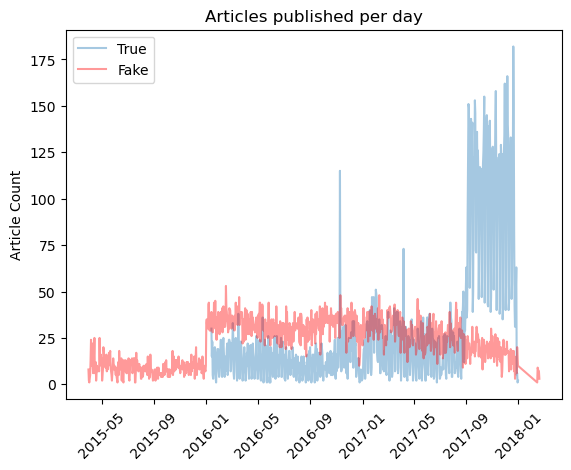

In [9]:
tnews = pd.to_datetime(true_news.date,errors='coerce').value_counts().sort_index()
fnews = pd.to_datetime(fake_news.date,errors='coerce').value_counts().sort_index()

plt.plot(tnews.index,tnews.values,label='True',alpha=0.4)
plt.plot(fnews.index,fnews.values,'red',label='Fake',alpha=0.4)
plt.xticks(rotation=45)
plt.ylabel("Article Count")
plt.legend(loc='upper left')
plt.title("Articles published per day")

In [10]:
#Analysing the dates, there are a few formats given and hence we will find those empty/dates that does not makes sense.
date_formats = [
    "%B %d, %Y",
    "%B %d, %Y ",
    "%b %d, %Y",
    '%d-%b-%y',
]

In [11]:
#No missing date values in the dataset
missing_values = news[news['date'].isnull()]
print("Rows with missing date values:", missing_values)

Rows with missing date values: Empty DataFrame
Columns: [title, text, subject, date, True/False]
Index: []


In [12]:
#We can analyse that 10 news have dates that are invalid. 
#Since it is just a small amount of data, we will be removing them from the dataset.
remove_dates = []
index=0
for dates in news['date']:
    parsed_date = None
    for date_format in date_formats:
        try:
            parsed_date = datetime.strptime(dates, date_format)
            break
        except ValueError:
            pass

    # Check if a valid date was found
    if parsed_date is None:
        print("Unable to parse date:", dates, "\nIndex:", index, "\n")
        remove_dates.append(index)
    index+=1
    
remove_dates

Unable to parse date: https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/ 
Index: 9358 

Unable to parse date: https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/ 
Index: 15507 

Unable to parse date: https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/ 
Index: 15508 

Unable to parse date: https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg 
Index: 15839 

Unable to parse date: https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg 
Index: 15840 

Unable to parse date: https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg 
Index: 17432 

Unable to parse date: https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg 
Index: 17433 

Unable to parse date: MSNBC HOST Rudely Assumes Steel Worker Would

[9358, 15507, 15508, 15839, 15840, 17432, 17433, 18933, 21869, 21870]

In [13]:
#Dropping the indexs with invalid dates.
for index in remove_dates:
    news.drop(index, axis=0, inplace=True)

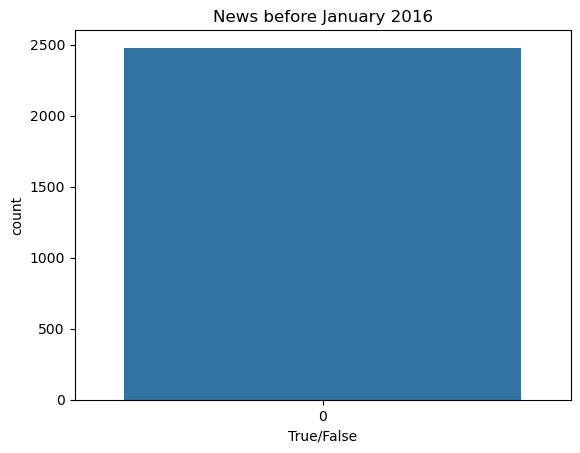

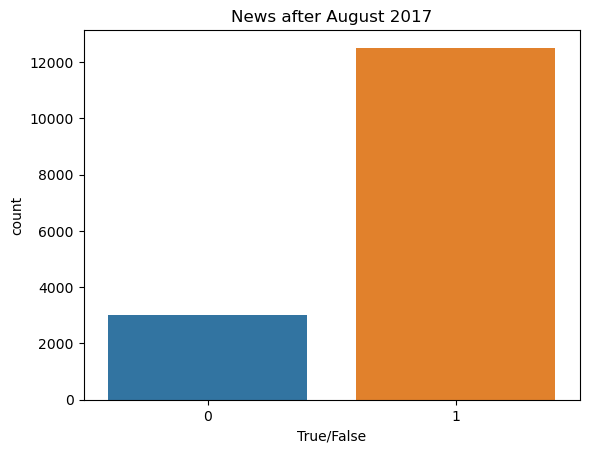

In [14]:
#Observing this information leak, we can easily train the model to detect fake/real just by passing in the dates.
#However, today's date will probably not tell us any information about whether a news story published today is real or fake.
#Hence we will not be using dates to perform regression as it can lead to artificially high accuracy.
news['date'] = pd.to_datetime(news['date'])
outliers_left = news[(news['date'] < pd.Timestamp('2016-01-01'))]
outliers_right = news[(news['date'] > pd.Timestamp('2017-08-01'))]

ax=sb.countplot(data=news, x=outliers_left["True/False"]).set(title='News before January 2016')
plt.show()

ax=sb.countplot(data=news, x=outliers_right["True/False"]).set(title='News after August 2017')
plt.show()

### Information Leak 3: 
Analysing the true and fake news, we realised that some news are duplicated. If two duplicates end up in different folds, the same example will be in both the training and test sets, causing the label to be leaked to the training set. The model will be overfitting on these data points and will perform very well on them and which can potentially lead to artificially high accuracy.

In [15]:
#We observe that there are 209 news that are duplicated, hence we will be dropping them.
news.duplicated().sum()
print("Before removing:")
news.describe()

Before removing:


,True/False
count,44888.000000
mean,0.477121
std,0.499482
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [16]:
news.drop_duplicates(inplace=True)
print("After removing:")
news.describe()

After removing:


,True/False
count,44676.000000
mean,0.474752
std,0.499368
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# Exploratory Data Analysis

In [17]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### All News Analysis

In [97]:
# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
news['words_titles'] = news['title'].apply(nltk.word_tokenize)
news['words_titles'] = news['words_titles'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [98]:
# Create a frequency distribution of the words
all_words_title = nltk.FreqDist(news['words_titles'].sum())

# Print the most common words
top_words_title = all_words_title.most_common(10)

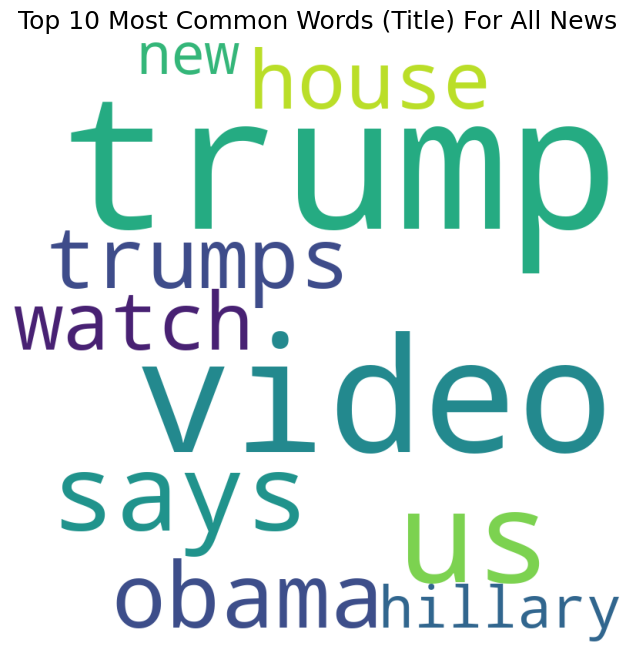

In [99]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(top_words_title))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 10 Most Common Words (Title) For All News', fontsize=18)
plt.show()

In [20]:
# Tokenize the text and remove stopwords
news['words_text'] = news['text'].apply(nltk.word_tokenize)
news['words_text'] = news['words_text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [56]:
# Create a frequency distribution of the words
all_words_text = nltk.FreqDist(news['words_text'].sum())
# Print the most common words
top_words_text = all_words_text.most_common(10)

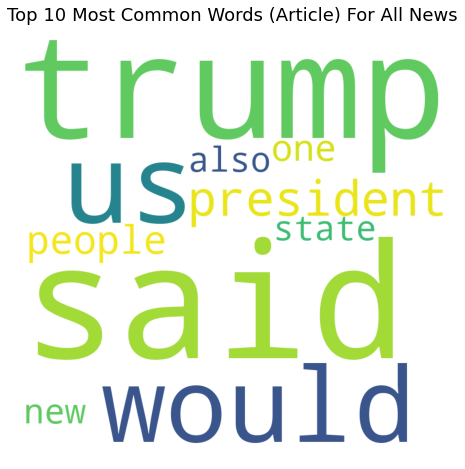

In [57]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(top_words_text))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 10 Most Common Words (Article) For All News', fontsize=18)
plt.show()

### Real News Analysis

In [21]:
# Tokenize the text and remove stopwords
news['words_titles_true'] = news.apply(lambda x: nltk.word_tokenize(x['title']) if x['True/False'] == 1 else [], axis=1)
news['words_titles_true'] = news['words_titles_true'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [40]:
# Create a frequency distribution of the words
all_words_title_true = nltk.FreqDist(news['words_titles_true'].sum())

# Print the most common words
top_words_title_true = all_words_title_true.most_common(10)

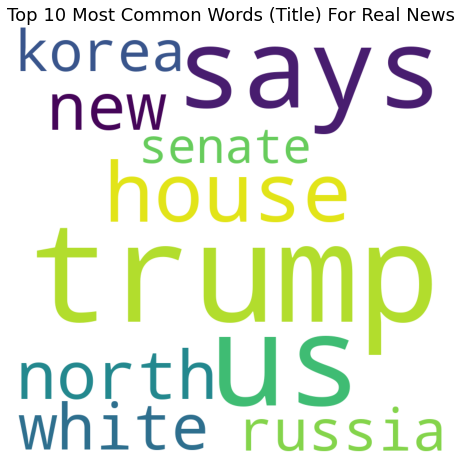

In [54]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(top_words_title_true))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 10 Most Common Words (Title) For Real News', fontsize=18)
plt.show()

In [22]:
# Tokenize the text and remove stopwords
news['words_text_true'] = news.apply(lambda x: nltk.word_tokenize(x['text']) if x['True/False'] == 1 else [], axis=1)
news['words_text_true'] = news['words_text_true'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [44]:
# Create a frequency distribution of the words
all_words_text_true = nltk.FreqDist(news['words_text_true'].sum())
# Print the most common words
top_words_text_true = all_words_text_true.most_common(10)

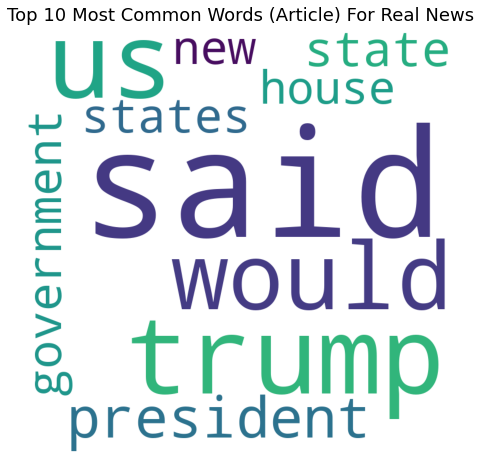

In [45]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(top_words_text_true))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 10 Most Common Words (Article) For Real News', fontsize=18)
plt.show()

### Fake News Analysis

In [23]:
# Tokenize the text and remove stopwords
news['words_titles_false'] = news.apply(lambda x: nltk.word_tokenize(x['title']) if x['True/False'] == 0 else [], axis=1)
news['words_titles_false'] = news['words_titles_false'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [25]:
# Create a frequency distribution of the words
all_words_title_false = nltk.FreqDist(news['words_titles_false'].sum())

# Print the most common words
top_words_title_false = all_words_title_false.most_common(10)

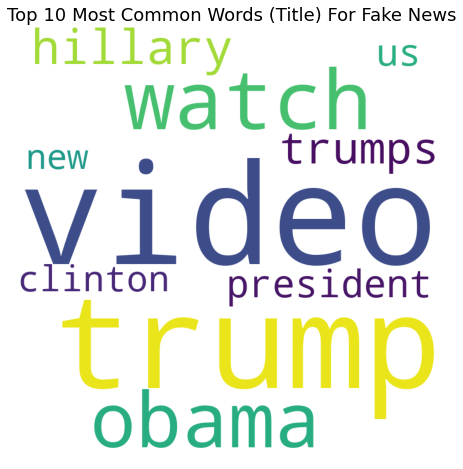

In [52]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(top_words_title_false))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 10 Most Common Words (Title) For Fake News', fontsize=18)
plt.show()

In [24]:
# Tokenize the text and remove stopwords
news['words_text_false'] = news.apply(lambda x: nltk.word_tokenize(x['text']) if x['True/False'] == 0 else [], axis=1)
news['words_text_false'] = news['words_text_false'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [47]:
# Create a frequency distribution of the words
all_words_text_false = nltk.FreqDist(news['words_text_false'].sum())
# Print the most common words
top_words_text_false = all_words_text_false.most_common(10)

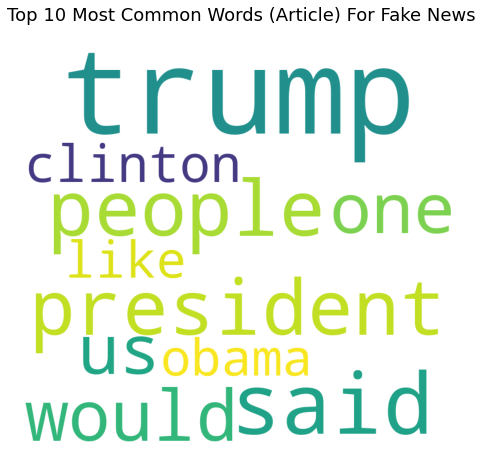

In [48]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(top_words_text_false))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 10 Most Common Words (Article) For Fake News', fontsize=18)
plt.show()

### Subject Analysis

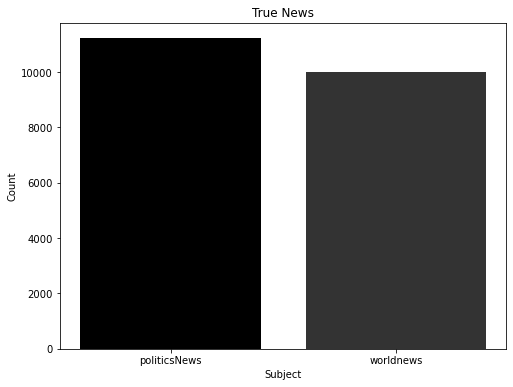

In [25]:
plt.figure(figsize=(8, 6))
colors = [(0,0,0), (0.2,0.2,0.2), (0.35,0.35,0.35), (0.5,0.5,0.5), (0.7,0.7,0.7), (0.9,0.9,0.9)]
plt.bar(news.loc[news['True/False'] == 1, 'subject'].value_counts().index, news.loc[news['True/False'] == 1, 'subject'].value_counts().values, color=colors)
plt.title('True News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.show()

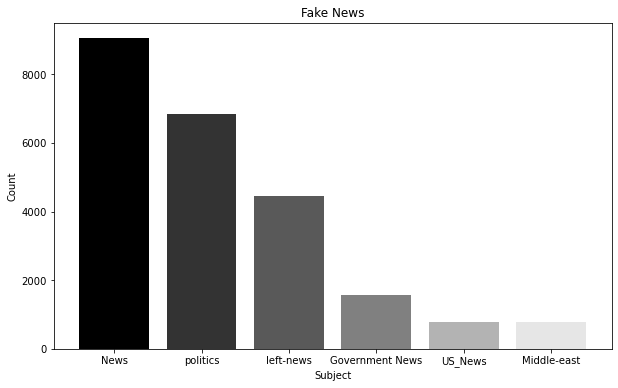

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(news.loc[news['True/False'] == 0, 'subject'].value_counts().index, news.loc[news['True/False'] == 0, 'subject'].value_counts().values, color=colors)
plt.title('Fake News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.show()

### Length Analysis of Text

In [27]:
news['title_length'] = news['title'].apply(len)
news['article_length'] = news['text'].apply(len)
news

,title,text,subject,date,True/False,words_titles,words_text,words_titles_true,words_text_true,words_titles_false,words_text_false,title_length,article_length
0,donald trump sends out embarrassing new years...,donald trump just couldn wish all americans a ...,News,2017-12-31,0,"[donald, trump, sends, embarrassing, new, year...","[donald, trump, wish, americans, happy, new, y...",[],[],"[donald, trump, sends, embarrassing, new, year...","[donald, trump, wish, americans, happy, new, y...",77,2588
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0,"[drunk, bragging, trump, staffer, started, rus...","[house, intelligence, committee, chairman, dev...",[],[],"[drunk, bragging, trump, staffer, started, rus...","[house, intelligence, committee, chairman, dev...",69,1836
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,News,2017-12-30,0,"[sheriff, david, clarke, becomes, internet, jo...","[friday, revealed, former, milwaukee, sheriff,...",[],[],"[sheriff, david, clarke, becomes, internet, jo...","[friday, revealed, former, milwaukee, sheriff,...",88,3301
3,trump is so obsessed he even has obamas name ...,on christmas day donald trump announced that h...,News,2017-12-29,0,"[trump, obsessed, even, obamas, name, coded, w...","[christmas, day, donald, trump, announced, wou...",[],[],"[trump, obsessed, even, obamas, name, coded, w...","[christmas, day, donald, trump, announced, wou...",75,2520
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,2017-12-25,0,"[pope, francis, called, donald, trump, christm...","[pope, francis, used, annual, christmas, day, ...",[],[],"[pope, francis, called, donald, trump, christm...","[pope, francis, used, annual, christmas, day, ...",70,2288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,fully committed nato backs new us approach on ...,brussels nato allies on tuesday welcomed presi...,worldnews,2017-08-22,1,"[fully, committed, nato, backs, new, us, appro...","[brussels, nato, allies, tuesday, welcomed, pr...","[fully, committed, nato, backs, new, us, appro...","[brussels, nato, allies, tuesday, welcomed, pr...",[],[],57,2680
44894,lexisnexis withdrew two products from chinese ...,london lexisnexis a provider of legal regulato...,worldnews,2017-08-22,1,"[lexisnexis, withdrew, two, products, chinese,...","[london, lexisnexis, provider, legal, regulato...","[lexisnexis, withdrew, two, products, chinese,...","[london, lexisnexis, provider, legal, regulato...",[],[],52,760
44895,minsk cultural hub becomes haven from authorities,minsk in the shadow of disused sovietera facto...,worldnews,2017-08-22,1,"[minsk, cultural, hub, becomes, authorities]","[minsk, shadow, disused, sovietera, factories,...","[minsk, cultural, hub, becomes, authorities]","[minsk, shadow, disused, sovietera, factories,...",[],[],49,1849
44896,vatican upbeat on possibility of pope francis ...,moscow vatican secretary of state cardinal pie...,worldnews,2017-08-22,1,"[vatican, upbeat, possibility, pope, francis, ...","[moscow, vatican, secretary, state, cardinal, ...","[vatican, upbeat, possibility, pope, francis, ...","[moscow, vatican, secretary, state, cardinal, ...",[],[],61,1152


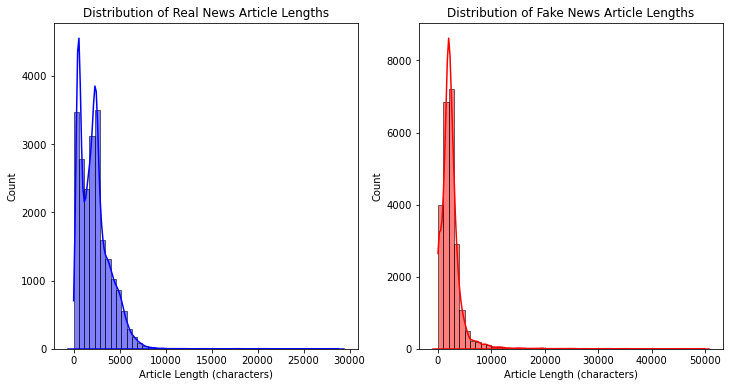

In [28]:
#We analaysed that both real and fake news are skewed to the right.
real_news = news[news['True/False'] == 1]
fake_news = news[news['True/False'] == 0]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sb.histplot(real_news['article_length'], bins=50, kde=True, color='blue')
sb.kdeplot(real_news['article_length'], color='blue')
plt.title('Distribution of Real News Article Lengths')
plt.xlabel('Article Length (characters)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sb.histplot(fake_news['article_length'], bins=50, kde=True, color='red')
sb.kdeplot(fake_news['article_length'], color='red')
plt.title('Distribution of Fake News Article Lengths')
plt.xlabel('Article Length (characters)')
plt.ylabel('Count')

plt.show()

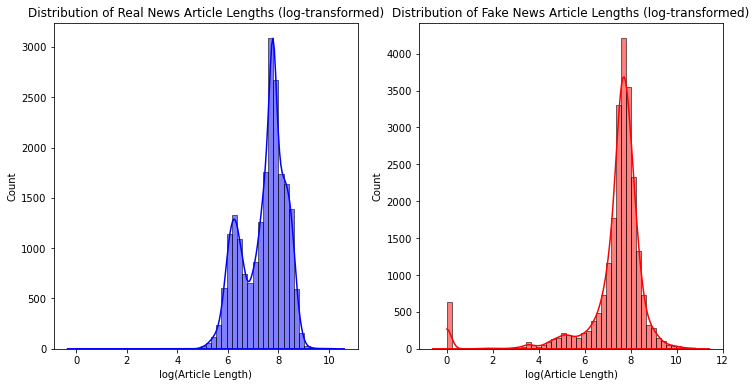

In [29]:
#To correct right skewness, we can apply log trasnformation to the data. 
#This will compress the long tail of the distribution and bring the data more towards the center of the plot.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sb.histplot(np.log(real_news['article_length']), bins=50, kde=True, color='blue')
sb.kdeplot(np.log(real_news['article_length']), color='blue')
plt.title('Distribution of Real News Article Lengths (log-transformed)')
plt.xlabel('log(Article Length)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sb.histplot(np.log(fake_news['article_length']), bins=50, kde=True, color='red')
sb.kdeplot(np.log(fake_news['article_length']), color='red')
plt.title('Distribution of Fake News Article Lengths (log-transformed)')
plt.xlabel('log(Article Length)')
plt.ylabel('Count')

plt.show()

In [30]:
real_news['article_length'].describe()

count    21210.000000
mean      2277.687930
std       1619.253163
min          1.000000
25%        862.000000
50%       2122.000000
75%       3096.000000
max      28758.000000
Name: article_length, dtype: float64

In [31]:
fake_news['article_length'].describe()

count    23466.000000
mean      2441.683627
std       2429.683994
min          1.000000
25%       1375.000000
50%       2077.000000
75%       2900.000000
max      49818.000000
Name: article_length, dtype: float64

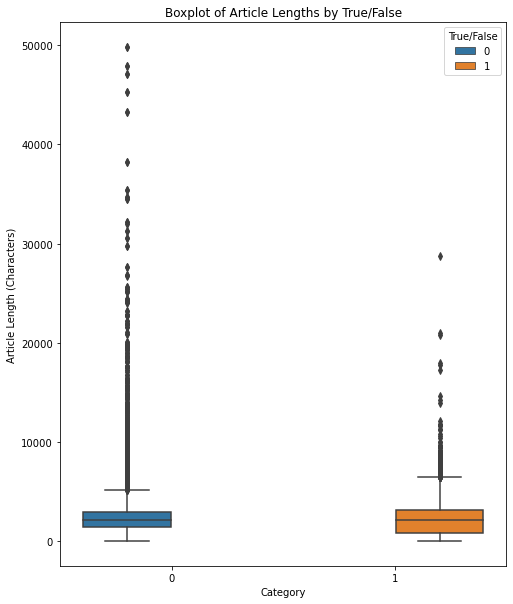

In [32]:
plt.figure(figsize=(8, 10))
sb.boxplot(x='True/False', y='article_length', data=news, hue='True/False')
plt.title('Boxplot of Article Lengths by True/False')
plt.xlabel('Category')
plt.ylabel('Article Length (Characters)')
plt.show()

### Length Analysis of Title

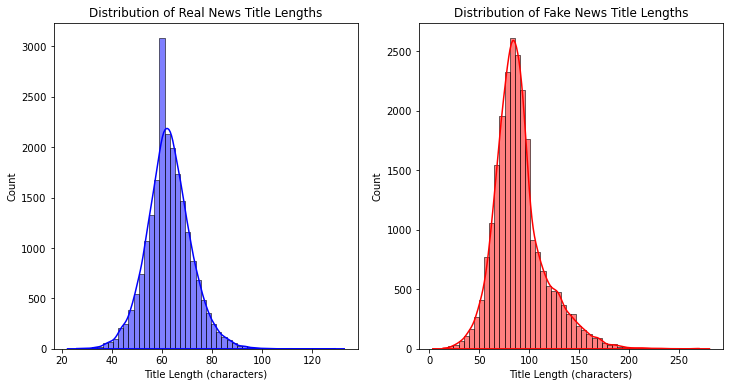

In [33]:
#We analaysed that both real and fake news are rather normally distributed.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sb.histplot(real_news['title_length'], bins=50, kde=True, color='blue')
sb.kdeplot(real_news['title_length'], color='blue')
plt.title('Distribution of Real News Title Lengths')
plt.xlabel('Title Length (characters)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sb.histplot(fake_news['title_length'], bins=50, kde=True, color='red')
sb.kdeplot(fake_news['title_length'], color='red')
plt.title('Distribution of Fake News Title Lengths')
plt.xlabel('Title Length (characters)')
plt.ylabel('Count')

plt.show()

In [34]:
real_news['title_length'].describe()

count    21210.000000
mean        62.748939
std          8.979685
min         26.000000
25%         57.000000
50%         63.000000
75%         68.000000
max        129.000000
Name: title_length, dtype: float64

In [35]:
fake_news['title_length'].describe()

count    23466.000000
mean        90.312196
std         26.039390
min         14.000000
25%         74.000000
50%         86.000000
75%        101.000000
max        270.000000
Name: title_length, dtype: float64

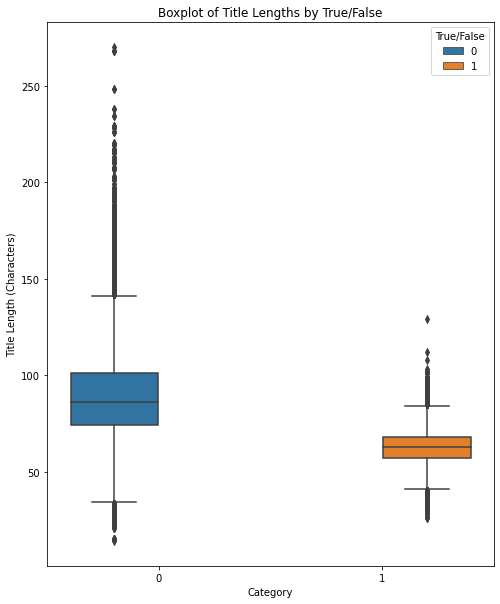

In [36]:
plt.figure(figsize=(8, 10))
sb.boxplot(x='True/False', y='title_length', data=news, hue='True/False')
plt.title('Boxplot of Title Lengths by True/False')
plt.xlabel('Category')
plt.ylabel('Title Length (Characters)')
plt.show()

### Sentimental Analysis of Titles

In [37]:
from textblob import TextBlob

# get the sentiment score for each article title
def get_sentiment_score(article):
    blob = TextBlob(article)
    return blob.sentiment.polarity

# map the sentiment score to a label
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# apply the function to the 'title' column to get the sentiment scores
news['sentiment_title_score'] = news['title'].apply(get_sentiment_score)

# apply the function to the 'sentiment_score' column to get the sentiment labels
news['sentiment_title_label'] = news['sentiment_title_score'].apply(get_sentiment_label)

# print the first 10 rows of the DataFrame
print(news['sentiment_title_label'][:10])

0    negative
1    negative
2     neutral
3    negative
4     neutral
5    negative
6    positive
7    negative
8     neutral
9    negative
Name: sentiment_title_label, dtype: object


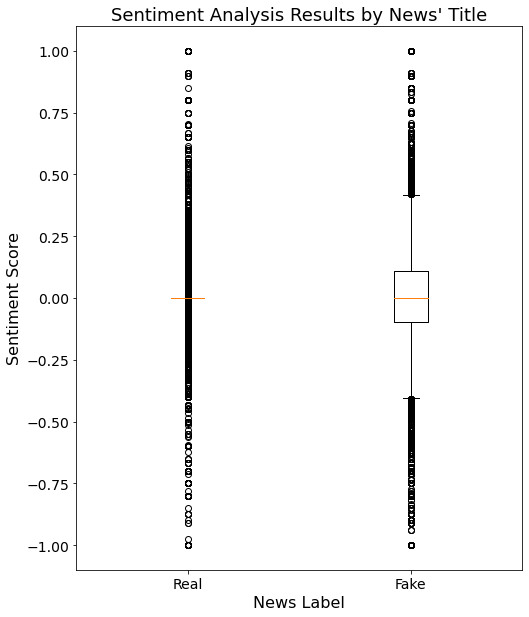

In [38]:
# filter the DataFrame by news label
real_news_title = news[news['True/False'] == 1]['sentiment_title_score']
fake_news_title = news[news['True/False'] == 0]['sentiment_title_score']

# create the boxplot
plt.figure(figsize=(8, 10))
plt.boxplot([real_news_title, fake_news_title], labels=['Real', 'Fake'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('News Label', fontsize=16)
plt.ylabel('Sentiment Score', fontsize=16)
plt.title("Sentiment Analysis Results by News' Title", fontsize=18)

# show the plot
plt.show()

In [39]:
real_news_title.describe()

count    21210.000000
mean         0.024640
std          0.183589
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: sentiment_title_score, dtype: float64

In [40]:
fake_news_title.describe()

count    23466.000000
mean         0.002722
std          0.317841
min         -1.000000
25%         -0.095685
50%          0.000000
75%          0.111111
max          1.000000
Name: sentiment_title_score, dtype: float64

### Sentimental Analysis of Text

In [41]:
# apply the function to the 'text' column to get the sentiment scores
news['sentiment_text_score'] = news['text'].apply(get_sentiment_score)

# apply the function to the 'sentiment_score' column to get the sentiment labels
news['sentiment_text_label'] = news['sentiment_text_score'].apply(get_sentiment_label)

# print the first 10 rows of the DataFrame
print(news['sentiment_text_label'][:10])

0    positive
1    negative
2    positive
3    positive
4    negative
5    positive
6    negative
7    positive
8    positive
9    positive
Name: sentiment_text_label, dtype: object


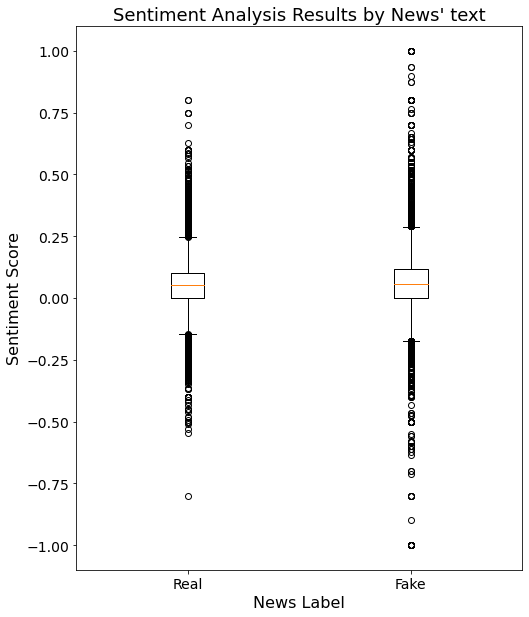

In [42]:
# filter the DataFrame by news label
real_news_text = news[news['True/False'] == 1]['sentiment_text_score']
fake_news_text = news[news['True/False'] == 0]['sentiment_text_score']

# create the boxplot
plt.figure(figsize=(8, 10))
plt.boxplot([real_news_text, fake_news_text], labels=['Real', 'Fake'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('News Label', fontsize=16)
plt.ylabel('Sentiment Score', fontsize=16)
plt.title("Sentiment Analysis Results by News' text", fontsize=18)

# show the plot
plt.show()

In [43]:
real_news_text.describe()

count    21210.000000
mean         0.053899
std          0.092204
min         -0.800000
25%          0.001415
50%          0.052391
75%          0.100340
max          0.800000
Name: sentiment_text_score, dtype: float64

In [44]:
fake_news_text.describe()

count    23466.000000
mean         0.059442
std          0.114931
min         -1.000000
25%          0.000000
50%          0.055542
75%          0.115681
max          1.000000
Name: sentiment_text_score, dtype: float64

# Machine Learning

### Logistics Regression Using Sentiment Score (Title)

Accuracy: 0.5001119068934646


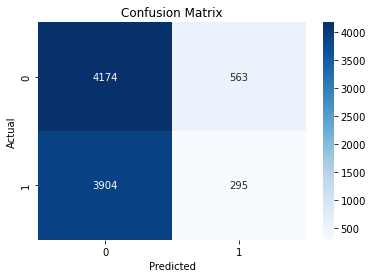

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = news['sentiment_title_score']
Y = news['True/False']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
clf = LogisticRegression()

# Train the model
clf.fit(X_train.values.reshape(-1, 1), Y_train)

# Predict on the test set
Y_pred = clf.predict(X_test.values.reshape(-1, 1))

# Calculate accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:', accuracy)

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
sb.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Logistics Regression Using Sentiment Score (Text)

Accuracy: 0.525626678603402


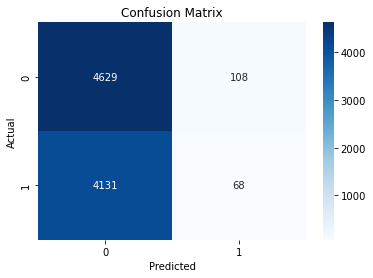

In [46]:
X = news['sentiment_text_score']
y = news['True/False']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
clf = LogisticRegression()

# Train the model
clf.fit(X_train.values.reshape(-1, 1), Y_train)

# Predict on the test set
Y_pred = clf.predict(X_test.values.reshape(-1, 1))

# Calculate accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:', accuracy)

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
sb.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Bag of Words and Logistic Regression on Titles

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Separate the target variable and the input features
X = news['title']
Y = news['True/False']

# Create an instance of the CountVectorizer class
vectorizer = CountVectorizer()

# Convert the text data into a bag of words representation
X_bow = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_bow, Y, test_size=0.2, random_state=42)

# Create an instance of the logistic regression class
logreg = LogisticRegression(max_iter=100000)

# Train the logistic regression model on the training data
logreg.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = logreg.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9622873769024172
Precision: 0.9463707813222376
Recall: 0.9749940462014766
F1-score: 0.9604692082111437


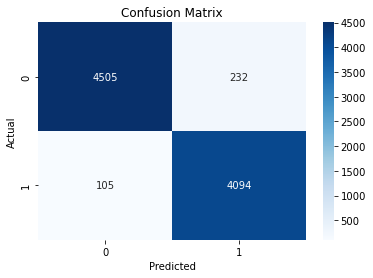

In [48]:
# Plot the confusion matrix
sb.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Bag of Words and Logistic Regression on Text

In [49]:
# Separate the target variable and the input features
X = news['text']
Y = news['True/False']

# Create an instance of the CountVectorizer class
vectorizer = CountVectorizer()

# Convert the text data into a bag of words representation
X_bow = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_bow, Y, test_size=0.2, random_state=42)

# Create an instance of the logistic regression class
logreg = LogisticRegression(max_iter=100000)

# Train the logistic regression model on the training data
logreg.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = logreg.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9908236347358997
Precision: 0.9907032181168057
Recall: 0.9897594665396523
F1-score: 0.9902311174648559


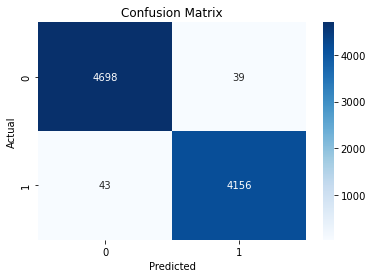

In [50]:
# Plot the confusion matrix
sb.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
news.to_csv('news_updated.csv', index=False)

# Deep Learning

In [18]:
# Load the data
news_data = pd.read_csv('news_updated.csv')
new_news_data = news_data.loc[:, ['text', 'True/False']]
new_news_data_2 = news_data.loc[:, ['title', 'True/False']]

### Pytorch Deep Learning (Text)

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from transformers import BertTokenizer, BertModel
from tqdm import tqdm

In [25]:
# Define the custom dataset
class NewsDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        text = self.data.iloc[idx]['text']
        label = self.data.iloc[idx]['True/False']
        
        encoding = self.tokenizer.encode_plus(
            text, 
            add_special_tokens=True, 
            truncation=True, 
            max_length=self.max_length,
            return_token_type_ids=False,
            pad_to_max_length=True, 
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Define the model
class NewsClassifier(nn.Module):
    def __init__(self, bert_model):
        super(NewsClassifier, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(p=0.1)
        self.fc1 = nn.Linear(self.bert.config.hidden_size, 2)
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc1(pooled_output)
        
        return logits

In [26]:
# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [28]:
# Split the data into training and validation sets
train_data, val_data = train_test_split(new_news_data, test_size=0.2, random_state=42)

# Initialize the tokenizer and the model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
model = NewsClassifier(bert_model).to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [29]:
# Initialize the optimizer and the loss function
optimizer = optim.Adam(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# Initialize the datasets and data loaders
train_dataset = NewsDataset(train_data, tokenizer, max_length=512)
val_dataset = NewsDataset(val_data, tokenizer, max_length=512)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [ ]:
# Train the model
best_val_loss = float('inf')
best_epoch = 0
patience = 5
current_patience = 0

for epoch in range(10):
    train_loss = 0.0
    val_loss = 0.0
    val_accuracy = 0.0
    
    # Train the model on the training set
    model.train()
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
    
        loss.backward()
        optimizer.step()
    
        train_loss += loss.item() * input_ids.size(0)

/Users/timothylee/opt/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
torch.save(model.state_dict(), 'news_classifier_text.pth')

In [30]:
def evaluate(model, test_loader, criterion):
    # Get the predicted labels for the test set
    model.eval()
    y_pred = []
    y_true = []
    test_loss = 0.0
    test_accuracy = 0.0
    with torch.no_grad():
        for batch in tqdm(test_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * input_ids.size(0)
            
            _, predicted = torch.max(outputs, 1)

            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(labels.cpu().numpy())
            
            test_accuracy += torch.sum(predicted == labels.data)

    # Calculate the confusion matrix
    conf_mat = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix
    plt.matshow(conf_mat, cmap=plt.cm.Blues)
    plt.colorbar()

    # Add labels to the plot
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            plt.text(j, i, str(conf_mat[i, j]), horizontalalignment='center', verticalalignment='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    
    test_loss /= len(test_loader.dataset)
    test_accuracy /= len(test_loader.dataset)
    
    print('Test Loss: {:.4f}, Test Accuracy: {:.4f}'.format(test_loss, test_accuracy))
    return test_loss, test_accuracy

In [41]:
model = NewsClassifier(bert_model).to(device)  # create an instance of your model class
model.load_state_dict(torch.load('news_classifier_text.pth'))
model.eval()  # set the model to evaluation mode

NewsClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tru

100%|██████████| 559/559 [02:48<00:00,  3.32it/s]


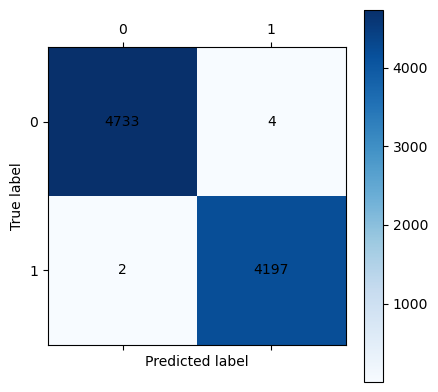

Test Loss: 0.0038, Test Accuracy: 0.9993


In [44]:
# Evaluate the model on the validation set
val_loss, val_acc = evaluate(model, val_loader, nn.CrossEntropyLoss())

### Pytorch Deep Learning (Title)

In [45]:
# Define the custom dataset
class NewsDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        text = self.data.iloc[idx]['title']
        label = self.data.iloc[idx]['True/False']
        
        encoding = self.tokenizer.encode_plus(
            text, 
            add_special_tokens=True, 
            truncation=True, 
            max_length=self.max_length,
            return_token_type_ids=False,
            pad_to_max_length=True, 
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Define the model
class NewsClassifier(nn.Module):
    def __init__(self, bert_model):
        super(NewsClassifier, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(p=0.1)
        self.fc1 = nn.Linear(self.bert.config.hidden_size, 2)
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc1(pooled_output)
        
        return logits

In [46]:
# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [47]:
# Split the data into training and validation sets
train_data, val_data = train_test_split(new_news_data_2, test_size=0.2, random_state=42)

# Initialize the tokenizer and the model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
model = NewsClassifier(bert_model).to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [48]:
# Initialize the optimizer and the loss function
optimizer = optim.Adam(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# Initialize the datasets and data loaders
train_dataset = NewsDataset(train_data, tokenizer, max_length=100)
val_dataset = NewsDataset(val_data, tokenizer, max_length=100)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [ ]:
# Train the model
best_val_loss = float('inf')
best_epoch = 0
patience = 5
current_patience = 0

for epoch in range(10):
    train_loss = 0.0
    val_loss = 0.0
    val_accuracy = 0.0
    
    # Train the model on the training set
    model.train()
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
    
        loss.backward()
        optimizer.step()
    
        train_loss += loss.item() * input_ids.size(0)

In [ ]:
torch.save(model.state_dict(), 'news_classifier_title.pth')

In [49]:
model = NewsClassifier(bert_model).to(device)  # create an instance of your model class
model.load_state_dict(torch.load('news_classifier_title.pth'))
model.eval()  # set the model to evaluation mode

NewsClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tru

  0%|          | 0/140 [00:00<?, ?it/s]/home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 140/140 [00:21<00:00,  6.59it/s]


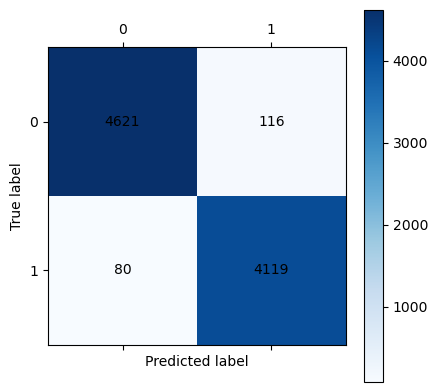

Test Loss: 0.1098, Test Accuracy: 0.9781


In [50]:
# Evaluate the model on the validation set
val_loss, val_acc = evaluate(model, val_loader, nn.CrossEntropyLoss())

### Keras Deep Learning (Text)

In [61]:
import tensorflow as tf
tf.keras.backend.set_image_data_format("channels_last")
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [54]:
# Load the data
news_data = pd.read_csv('news_updated.csv')
new_news_data = news_data.loc[:, ['text', 'True/False']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_news_data['text'], new_news_data['True/False'], test_size=0.2, random_state=42)

# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train = pad_sequences(X_train, maxlen=1000)
X_test = pad_sequences(X_test, maxlen=1000)

# Define model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=1000))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-03-12 04:50:32.944715: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-12 04:50:32.957802: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-12 04:50:32.958089: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-12 04:50:32.958829: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [ ]:
# Train model
model.fit(X_train, y_train, epochs=10, batch_size=64)

In [ ]:
# Save model
model.save('news_classifier_text.h5')

In [62]:
model = load_model('news_classifier_text.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 64)          320000    
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 353,089
Trainable params: 353,089
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Test model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)
print('Accuracy:', accuracy_score(y_test, y_pred_binary))

280/280 [==============================] - 85s 302ms/step
Accuracy: 0.9720232766338407


### Keras Deep Learning (Title)

In [64]:
# Load the data
news_data = pd.read_csv('news_updated.csv')
new_news_data_2 = news_data.loc[:, ['title', 'True/False']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_news_data_2['title'], new_news_data_2['True/False'], test_size=0.2, random_state=42)

# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

# Define model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train model
model.fit(X_train, y_train, epochs=10, batch_size=64)

In [ ]:
# Save model
model.save('news_classifier_title.h5')

In [67]:
model = load_model('news_classifier_title.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 64)           320000    
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 353,089
Trainable params: 353,089
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Test model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)
print('Accuracy:', accuracy_score(y_test, y_pred_binary))

280/280 [==============================] - 10s 33ms/step
Accuracy: 0.9578111011638317


### XGBoost Deep Learning (Text)

In [72]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [92]:
# Separate the text (X) and labels (y)
X = new_news_data['text']
y = new_news_data['True/False']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Define the XGBoost model
model = xgb.XGBClassifier(n_estimators=1000, max_depth=6, learning_rate=0.01, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic')

In [94]:
# Train the model
model.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
import pickle
with open('news_classifier_text.pkl', 'wb') as f:
    pickle.dump(model, f)

In [107]:
with open('news_classifier_text.pkl', 'rb') as f:
    model = pickle.load(f)

In [108]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9867949865711728


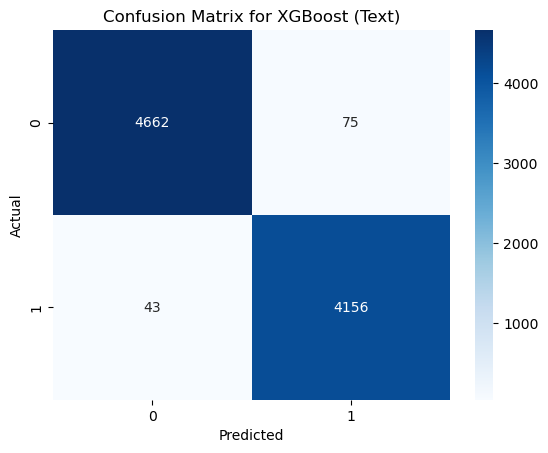

In [109]:
sb.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for XGBoost (Text)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### XGBoost Deep Learning (Title)

In [121]:
# Separate the text (X) and labels (y)
X = new_news_data_2['title']
y = new_news_data_2['True/False']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Define the XGBoost model
model = xgb.XGBClassifier(n_estimators=1000, max_depth=6, learning_rate=0.01, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic')

In [122]:
# Train the model
model.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [124]:
import pickle
with open('news_classifier_title.pkl', 'wb') as f:
    pickle.dump(model, f)

In [125]:
with open('news_classifier_title.pkl', 'rb') as f:
    model = pickle.load(f)

In [126]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9081244404655326


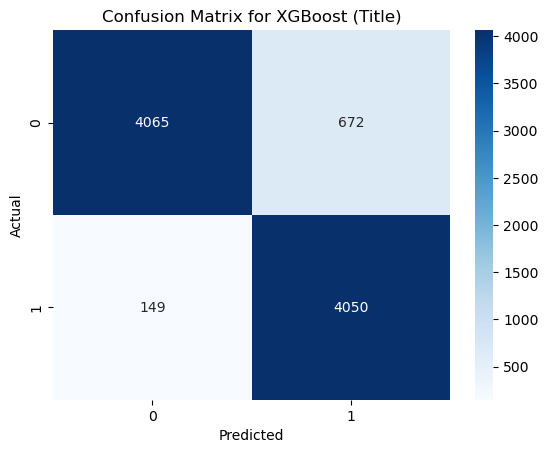

In [127]:
sb.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for XGBoost (Title)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### XGBoost with Cross Validation (Text)

In [128]:
from sklearn.model_selection import cross_val_score

In [129]:
# Separate the text (X) and labels (y)
X = new_news_data['text']
y = new_news_data['True/False']

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf.fit_transform(X)

# Define the XGBoost model
model = xgb.XGBClassifier(n_estimators=1000, max_depth=6, learning_rate=0.01, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic')

# Perform 5-fold cross-validation
scores = cross_val_score(model, X_tfidf, y, cv=5)

# Calculate the average accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

print('Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

Accuracy: 0.9793399108953104
Standard Deviation: 0.008189122658692646


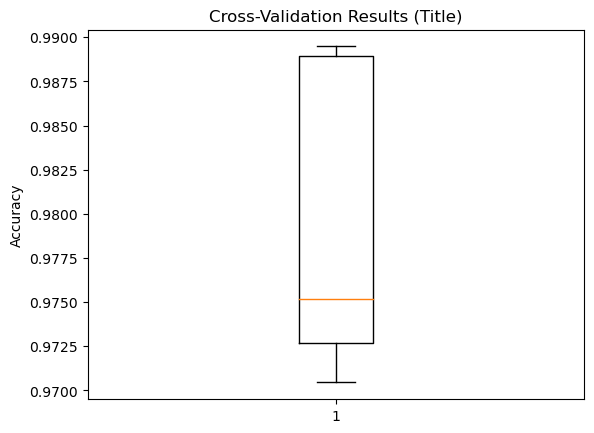

In [130]:
# Create a box plot
fig, ax = plt.subplots()
ax.boxplot(scores)

# Set the labels and title
ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation Results (Title)')

# Show the plot
plt.show()

### XGBoost with Cross Validation (Title)

In [80]:
# Separate the text (X) and labels (y)
X = new_news_data_2['title']
y = new_news_data_2['True/False']

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf.fit_transform(X)

# Define the XGBoost model
model = xgb.XGBClassifier(n_estimators=1000, max_depth=6, learning_rate=0.01, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic')

# Perform 5-fold cross-validation
scores = cross_val_score(model, X_tfidf, y, cv=5)

# Calculate the average accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

print('Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

Accuracy: 0.894350631913867
Standard Deviation: 0.026272230443653052


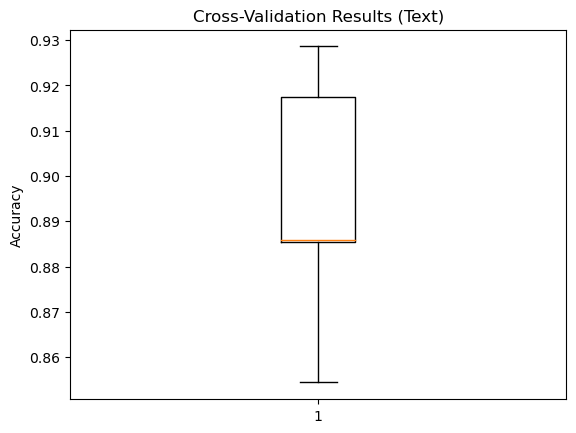

In [83]:
# Create a box plot
fig, ax = plt.subplots()
ax.boxplot(scores)

# Set the labels and title
ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation Results (Text)')

# Show the plot
plt.show()